In [1]:
import pandas as pd
import numpy as np
import math
from sklearn import linear_model

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

In [2]:
df = pd.read_csv('marketing_customer_analysis.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
df.columns= [col.lower() for col in df.columns]
df.rename(columns={'st':'state'},inplace=True)
df

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [4]:
#df=df.drop('effective to date', inplace=True, axis=1)
df=df.drop(['effective to date'],axis=1)
df

,customer,state,customer lifetime value,response,coverage,education,employmentstatus,gender,income,location code,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,Employed,M,21941,Suburban,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [5]:

#df=df.drop('effective to date', inplace=True, axis=1)
df=df.drop(['customer'],axis=1)
df

,state,customer lifetime value,response,coverage,education,employmentstatus,gender,income,location code,marital status,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,Employed,M,71941,Urban,Married,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,Employed,M,21941,Suburban,Married,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [6]:
df.shape

(9134, 22)

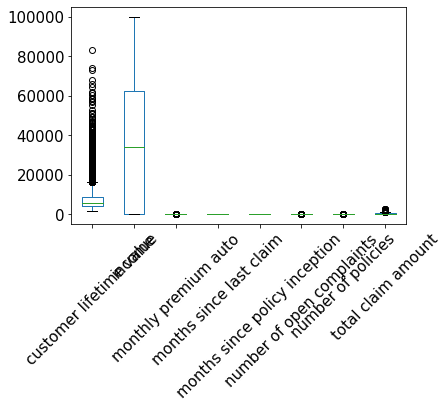

In [7]:
boxplot =df.boxplot(grid=False, rot=45, fontsize=15) 

In [8]:
df.shape

(9134, 22)

In [9]:
# removing the outliers from IC1 - we don't always do it, only for good reasons
# but if we want to do it, this is how:
iqr = np.percentile(df['customer lifetime value'],75) - np.percentile(df['customer lifetime value'],25)
upper_limit = np.percentile(df['customer lifetime value'],75) + 1.5*iqr
lower_limit = np.percentile(df['customer lifetime value'],25) - 1.5*iqr


In [10]:
upper_limit

16414.039911750002

C:\Users\ABHIRAM\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


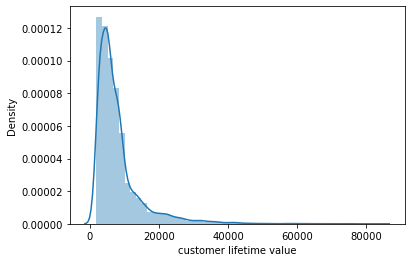

In [11]:
data1 = df[(df['customer lifetime value']>lower_limit) & (df['customer lifetime value']<upper_limit)].copy()
sns.distplot(df['customer lifetime value'])
plt.show()

C:\Users\ABHIRAM\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


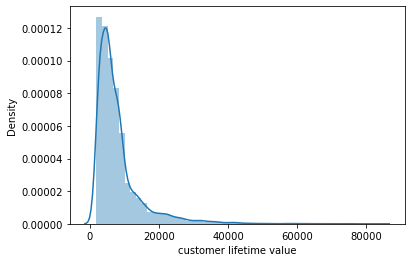

In [12]:
data2 = df[(df['customer lifetime value']>np.percentile(df['customer lifetime value'],25) - 3*iqr) & (df['customer lifetime value']<np.percentile(df['customer lifetime value'],75) + 3*iqr)].copy()
sns.distplot(df['customer lifetime value'])
plt.show()

In [13]:
data1.shape

(8317, 22)

In [14]:
data2.shape

(8767, 22)

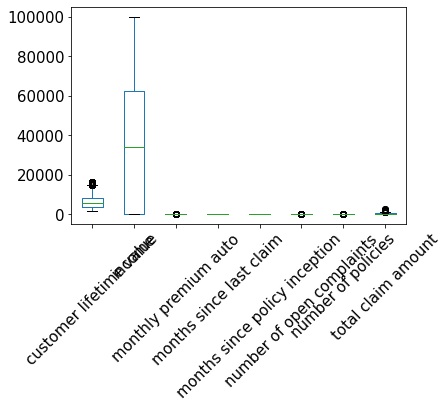

In [15]:
boxplot = data1.boxplot(grid=False, rot=45, fontsize=15) 

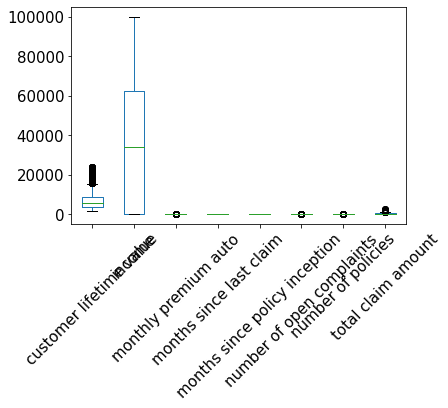

In [16]:
boxplot = data2.boxplot(grid=False, rot=45, fontsize=15) 

 Processing data after removing outliers
X-y split.
Normalize (numerical). 
One Hot/Label Encoding (categorical).
Concat DataFrames

In [17]:
#separate the features from the labels
y = data1['total claim amount']
X = data1.drop(['total claim amount'], axis=1)

In [18]:
X.shape

(8317, 21)

In [19]:
#categorical features and numerical ones are going to be treated differently
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [20]:
X_num.describe().T

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,8317.0,6279.177892,3240.426385,1898.007675,3746.751625,5470.060561,8162.617053,16407.66461
income,8317.0,37638.476855,30415.335684,0.000000,0.000000,33837.000000,62229.000000,99981.00000
monthly premium auto,8317.0,90.949621,31.047412,61.000000,68.000000,81.000000,107.000000,298.00000
months since last claim,8317.0,15.034387,10.038850,0.000000,6.000000,14.000000,23.000000,35.00000
months since policy inception,8317.0,48.063124,27.920250,0.000000,24.000000,48.000000,71.000000,99.00000
number of open complaints,8317.0,0.393171,0.927140,0.000000,0.000000,0.000000,0.000000,5.00000
number of policies,8317.0,3.037994,2.470996,1.000000,1.000000,2.000000,4.000000,9.00000


In [21]:
# used standard scalar instead of minmax scalar to improve r2 score

In [22]:
# alternatively you could use StandardScaler:
from sklearn.preprocessing import StandardScaler
Standardtransformer = StandardScaler().fit(X_num)
X_standardized = Standardtransformer.transform(X_num)
print(X_standardized.shape)
X_standardized = pd.DataFrame(X_standardized,columns=X_num.columns)
X_standardized.head()
X_standardized.describe().T

(8317, 7)


,count,mean,std,min,25%,50%,75%,max
customer lifetime value,8317.0,2.061328e-16,1.00006,-1.352116,-0.781557,-0.249710,0.581267,3.125853
income,8317.0,3.040332e-16,1.00006,-1.237558,-1.237558,-0.124993,0.808540,2.049830
monthly premium auto,8317.0,-2.312086e-16,1.00006,-0.964699,-0.739224,-0.320485,0.516995,6.669246
months since last claim,8317.0,1.017182e-16,1.00006,-1.497710,-0.899997,-0.103045,0.793526,1.988954
months since policy inception,8317.0,-8.289630e-17,1.00006,-1.721547,-0.861904,-0.002261,0.821563,1.824480
number of open complaints,8317.0,6.347373e-16,1.00006,-0.424094,-0.424094,-0.424094,-0.424094,4.969162
number of policies,8317.0,2.230591e-17,1.00006,-0.824816,-0.824816,-0.420097,0.389342,2.412940


In [23]:
from sklearn.preprocessing import MinMaxScaler
MinMaxtransformer = MinMaxScaler().fit(X_num)
X_normalized = MinMaxtransformer.transform(X_num)
print(type(X_normalized))
X_normalized = pd.DataFrame(X_normalized,columns=X_num.columns)
display(X_normalized.head())
print(type(X_normalized))

<class 'numpy.ndarray'>


,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
0,0.059651,0.562847,0.033755,0.914286,0.050505,0.0,0.000
1,0.350217,0.000000,0.139241,0.371429,0.424242,0.0,0.875
2,0.757387,0.487763,0.198312,0.514286,0.383838,0.0,0.125
3,0.396140,0.000000,0.189873,0.514286,0.656566,0.0,0.750
4,0.063109,0.438443,0.050633,0.342857,0.444444,0.0,0.000


<class 'pandas.core.frame.DataFrame'>


In [24]:
# One Hot/Label Encoding (categorical).


In [25]:
X_cat = data1.select_dtypes(include = object)

In [26]:
#one hot encoding is a way to turn categorical variables into multiple numerical columns
from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder().fit(X_cat)
encoder = OneHotEncoder(drop='first').fit(X_cat)
print(encoder.categories_)
encoded = encoder.transform(X_cat).toarray()
print(encoded)
# #onehot_encoded = pd.DataFrame(encoded,columns=['Female', 'Male','U'])
# onehot_encoded = pd.DataFrame(encoded,columns=['Male', 'U'])
# onehot_encoded.head(20)

[array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
      dtype=object), array(['No', 'Yes'], dtype=object), array(['Basic', 'Extended', 'Premium'], dtype=object), array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
      dtype=object), array(['Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed'],
      dtype=object), array(['F', 'M'], dtype=object), array(['Rural', 'Suburban', 'Urban'], dtype=object), array(['Divorced', 'Married', 'Single'], dtype=object), array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object), array(['Corporate L1', 'Corporate L2', 'Corporate L3', 'Personal L1',
       'Personal L2', 'Personal L3', 'Special L1', 'Special L2',
       'Special L3'], dtype=object), array(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype=object), array(['Agent', 'Branch', 'Call Center', 'Web'], dtype=object), array(['Four-Door Car', 'Luxury Car', 'Luxury SUV', 'SUV', 'Sports Car',
       'Two-Door Car'], dtype=object), ar

In [27]:
encoder = OneHotEncoder(drop='first').fit(X_cat)

cols = encoder.get_feature_names_out(input_features=X_cat.columns)

X_cat_encode = pd.DataFrame(encoder.transform(X_cat).toarray(),columns=cols)

X_cat_encode.head()

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,...,sales channel_Branch,sales channel_Call Center,sales channel_Web,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Medsize,vehicle size_Small
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Concat DataFrames


In [28]:
X = pd.concat([X_standardized,X_cat_encode], axis=1)  # np.concatenate()
X

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,state_California,state_Nevada,state_Oregon,...,sales channel_Branch,sales channel_Call Center,sales channel_Web,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Medsize,vehicle size_Small
0,-1.085002,0.612738,-0.707014,1.690097,-1.542454,-0.424094,-0.824816,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.216144,-1.237558,0.098255,-0.202664,-0.217172,-0.424094,2.008220,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.039439,0.365907,0.549205,0.295431,-0.360446,-0.424094,-0.420097,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.421786,-1.237558,0.484784,0.295431,0.606653,-0.424094,1.603501,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-1.069518,0.203775,-0.578171,-0.302283,-0.145535,-0.424094,-0.824816,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8312,-0.672415,0.332830,0.420362,0.096193,0.355924,-0.424094,-0.824816,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8313,-0.982234,-0.527216,-0.384906,-0.103045,-0.718630,-0.424094,-0.824816,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8314,0.581660,-1.237558,-0.191642,-0.601140,-0.396264,2.811859,-0.420097,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8315,0.384313,-0.516135,0.162676,1.889335,-1.614091,-0.424094,-0.015377,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# X = pd.concat([X_normalized,X_cat_encode], axis=1)  # np.concatenate()
# X 

In [30]:
# Linear Regression
## Train-test split.
## Apply linear regression.

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6653, 50)
(1664, 50)
(6653,)
(1664,)


In [33]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

# Model Validation


In [34]:
from sklearn.metrics import mean_absolute_error, r2_score

In [35]:
# r2

predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.7665124239654606

In [36]:
# MSE.
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_train,predictions)
mse

18120.70471059904

In [37]:
from sklearn.metrics import mean_squared_error

# RMSE
rmse = np.sqrt(mean_squared_error(y_train,predictions))
rmse

134.61316692879282

In [38]:
#MAE 
mae = mean_absolute_error(y_train, predictions)
print(mae)

92.04350384899989


In [39]:
predictions = lm.predict(X_test)
r2_score(y_test, predictions)

0.7672345838214161

In [ ]:
#      df1=df1.rename(columns={"Pos": "pos", "Name": "Country","Value":   "Population"})
    df2=df2.rename(columns={"Pos": "pos", "Name": "Country","Value": "Obesity Rate"})
    
#     df=pd.merge(df1,df2, on="Country")
    print(df1.head)